In [ ]:
import numpy as np
import pandas as pd
from nltk.classify import NaiveBayesClassifier
from nltk.corpus import subjectivity
from nltk.sentiment import SentimentAnalyzer
from nltk.sentiment.util import *
import matplotlib.pyplot as mlpt
import tweepy
import csv
import random

/usr/local/lib/python3.7/dist-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving output (1).csv to output (1).csv


In [ ]:
cdata = pd.read_csv('output (1).csv')

In [ ]:
cdata

,created_at,text
0,Wed Jan 01 03:59:03 +0000 2014,RT @philstockworld: Summary of Yesterday's Web...
1,Wed Jan 01 03:29:29 +0000 2014,RT @philstockworld: Summary of Yesterday's Web...
2,Wed Jan 01 18:08:47 +0000 2014,iTV Will Boost Apple http://t.co/8dup4cQc08 $A...
3,Wed Jan 01 01:52:31 +0000 2014,#iPhone users are more intelligent than #Samsu...
4,Wed Jan 01 01:18:36 +0000 2014,RT @philstockworld: Summary of Yesterday's Web...
...,...,...
20663,Sat Jan 11 05:12:03 +0000 2014,$AAPL Apple to open new store in Brisbane CBD ...
20664,Sun Jan 12 14:12:07 +0000 2014,$AAPL What's Behind The Swift Rise In Apple St...
20665,Sun Jan 12 17:50:32 +0000 2014,RT @SupremeSees: $OXBT Monday Gapper? http://t...
20666,Sun Jan 12 14:22:58 +0000 2014,Apple Inc. (AAPL): What's Behind The Swift Ris...


In [ ]:
from datetime import datetime
count=0
for dates in cdata['created_at'] :
    dates = datetime.strftime(datetime.strptime(dates,'%a %b %d %H:%M:%S +0000 %Y'), '%Y-%m-%d')
    cdata.at[count,'created_at']=dates
    count=count+1



In [ ]:
cdata

,created_at,text
0,2014-01-01,RT @philstockworld: Summary of Yesterday's Web...
1,2014-01-01,RT @philstockworld: Summary of Yesterday's Web...
2,2014-01-01,iTV Will Boost Apple http://t.co/8dup4cQc08 $A...
3,2014-01-01,#iPhone users are more intelligent than #Samsu...
4,2014-01-01,RT @philstockworld: Summary of Yesterday's Web...
...,...,...
20663,2014-01-11,$AAPL Apple to open new store in Brisbane CBD ...
20664,2014-01-12,$AAPL What's Behind The Swift Rise In Apple St...
20665,2014-01-12,RT @SupremeSees: $OXBT Monday Gapper? http://t...
20666,2014-01-12,Apple Inc. (AAPL): What's Behind The Swift Ris...


In [ ]:
cdata = cdata.drop_duplicates(ignore_index=True)
cdata.columns = ['Date','Tweets']
cdata

,Date,Tweets
0,2014-01-01,RT @philstockworld: Summary of Yesterday's Web...
1,2014-01-01,iTV Will Boost Apple http://t.co/8dup4cQc08 $A...
2,2014-01-01,#iPhone users are more intelligent than #Samsu...
3,2014-01-01,2013 Wrap-Up And Trading Set Review - Part III...
4,2014-01-01,Apple Screwed Up Big Time http://t.co/Q2Pzk2VO...
...,...,...
17645,2014-01-11,$AAPL Apple to open new store in Brisbane CBD ...
17646,2014-01-12,$AAPL What's Behind The Swift Rise In Apple St...
17647,2014-01-12,RT @SupremeSees: $OXBT Monday Gapper? http://t...
17648,2014-01-12,Apple Inc. (AAPL): What's Behind The Swift Ris...


In [ ]:
    cdata = cdata.sort_values(by='Date' , ignore_index=True)
    cdata
    from bs4 import BeautifulSoup

In [ ]:
def handle_emojis(tweet):
    # Smile -- :), : ), :-), (:, ( :, (-:, :'),:D, : D, =)
    tweet = re.sub(r'(:\s?\)|:-\)|\(\s?:|\(-:|:\'\))|:\s?D | =\)', '', tweet)
    # Sad -- :-(, : (, :(, ):, )-: , :p
    tweet = re.sub(r'(:\s?\(|:-\(|\)\s?:|\)-:)|:p', '', tweet)
    return tweet

In [ ]:
index=0
for index,row in cdata.iterrows():
    stre=row["Tweets"]
    # my_new_string=clean(stre)
    my_new_string = re.sub('[^ a-zA-Z0-9]', '', stre)
    # my_new_string=my_new_string.lower().split()
    cdata.sort_index()
    cdata.at[index,'Date']=row["Date"]
    cdata.at[index,'Tweets']=my_new_string
    index=index+1

In [ ]:
cdata

,Date,Tweets
0,2013-12-31,RT philstockworld Summary of Yesterdays Webcas...
1,2014-01-01,RT philstockworld Summary of Yesterdays Webcas...
2,2014-01-01,iTV Will Boost Apple httptco8dup4cQc08 AAPL APPLE
3,2014-01-01,iPhone users are more intelligent than Samsung...
4,2014-01-01,2013 WrapUp And Trading Set Review Part III h...
...,...,...
17645,2016-03-31,REVIEW This is Apples best iPad AAPL httpstcoL...
17646,2016-03-31,Apple now collecting some ResearchKit data fro...
17647,2016-03-31,AAPL Just got this email from AppleWhy Apples ...
17648,2016-03-31,RT businessinsider This guy found a hidden way...


In [ ]:
read_stock_p = pd.read_csv('AAPL.csv')

In [ ]:
read_stock_p

,Date,Open,High,Low,Close,Adj Close,Volume
0,2013-12-31,19.791786,20.045713,19.785713,20.036428,17.849323,223084400
1,2014-01-02,19.845715,19.893929,19.715000,19.754642,17.598297,234684800
2,2014-01-03,19.745001,19.775000,19.301071,19.320715,17.211735,392467600
3,2014-01-06,19.194643,19.528570,19.057142,19.426071,17.305593,412610800
4,2014-01-07,19.440001,19.498571,19.211430,19.287144,17.181829,317209200
...,...,...,...,...,...,...,...
560,2016-03-23,26.620001,26.767500,26.475000,26.532499,24.678110,102814000
561,2016-03-24,26.367500,26.562500,26.222500,26.417500,24.571148,104532000
562,2016-03-28,26.500000,26.547501,26.264999,26.297501,24.459534,77645600
563,2016-03-29,26.222500,26.947500,26.219999,26.920000,25.038527,124760400


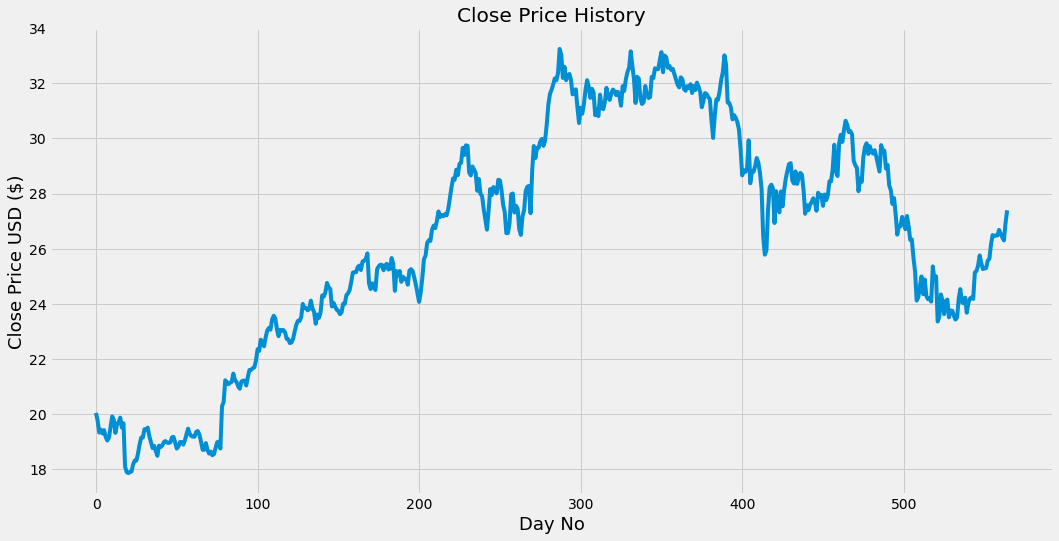

In [ ]:
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(read_stock_p['Close'])
plt.xlabel('Day No', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

In [ ]:
cdata['Prices']=""
cdata

,Date,Tweets,Prices
0,2013-12-31,RT philstockworld Summary of Yesterdays Webcas...,
1,2014-01-01,RT philstockworld Summary of Yesterdays Webcas...,
2,2014-01-01,iTV Will Boost Apple httptco8dup4cQc08 AAPL APPLE,
3,2014-01-01,iPhone users are more intelligent than Samsung...,
4,2014-01-01,2013 WrapUp And Trading Set Review Part III h...,
...,...,...,...
17645,2016-03-31,REVIEW This is Apples best iPad AAPL httpstcoL...,
17646,2016-03-31,Apple now collecting some ResearchKit data fro...,
17647,2016-03-31,AAPL Just got this email from AppleWhy Apples ...,
17648,2016-03-31,RT businessinsider This guy found a hidden way...,


In [ ]:
ccdata = cdata
indx=0
for i in range (0,len(ccdata)):
    for j in range (0,len(read_stock_p)):
        get_tweet_date=ccdata.Date.iloc[i]
        get_stock_date=read_stock_p.Date.iloc[j]
        if(str(get_stock_date)==str(get_tweet_date)):
            #print(get_stock_date," ",get_tweet_date)
            ccdata.at[i,'Prices'] = read_stock_p.Close[j]
            break

In [ ]:
ccdata

,Date,Tweets,Prices
0,2013-12-31,RT philstockworld Summary of Yesterdays Webcas...,20.0364
1,2014-01-01,RT philstockworld Summary of Yesterdays Webcas...,
2,2014-01-01,iTV Will Boost Apple httptco8dup4cQc08 AAPL APPLE,
3,2014-01-01,iPhone users are more intelligent than Samsung...,
4,2014-01-01,2013 WrapUp And Trading Set Review Part III h...,
...,...,...,...
17645,2016-03-31,REVIEW This is Apples best iPad AAPL httpstcoL...,
17646,2016-03-31,Apple now collecting some ResearchKit data fro...,
17647,2016-03-31,AAPL Just got this email from AppleWhy Apples ...,
17648,2016-03-31,RT businessinsider This guy found a hidden way...,


In [ ]:
# mean=0
# summ=0
# count=0
# for i in range(0,len(ccdata)):
#     if(ccdata.Prices.iloc[i]!=""):
#         summ=summ+int(ccdata.Prices.iloc[i])
#         count=count+1
# mean=summ/count
# for i in range(0,len(ccdata)):
#     if(ccdata.Prices.iloc[i]==""):
#         ccdata.Prices.iloc[i]=int(mean)

In [ ]:
def getnext(i):
  flg=0
  for j in range(i+1,len(ccdata)):
      if ccdata.Prices.iloc[j]=="":
        continue
      else:
        nextt=ccdata.Prices.iloc[j]
        flg=1
        index=j
        break
  if flg==0:
      return -1,index
  else:
      return nextt,index
  






In [ ]:
prev=ccdata.Prices.iloc[0]
i=0
while i<17628:
  # print(i)
  if ccdata.Prices.iloc[i]!="":
    prev=ccdata.Prices.iloc[i]
    i+=1
  else:
    if i==len(ccdata)-1:
      break
    nextt,index=getnext(i)
    if nextt==-1:
       for k in range(i,index):
          ccdata.Prices.iloc[k]=prev
       break
    else:
      


      for k in range(i,index):
        ccdata.Prices.iloc[k]=(prev+nextt)/2
      i=index
for i in range(17630,len(ccdata)):
   ccdata.Prices.iloc[i]=27
      


In [ ]:
ccdata

,Date,Tweets,Prices
0,2013-12-31,RT philstockworld Summary of Yesterdays Webcas...,20.0364
1,2014-01-01,RT philstockworld Summary of Yesterdays Webcas...,19.8955
2,2014-01-01,iTV Will Boost Apple httptco8dup4cQc08 AAPL APPLE,19.8955
3,2014-01-01,iPhone users are more intelligent than Samsung...,19.8955
4,2014-01-01,2013 WrapUp And Trading Set Review Part III h...,19.8955
...,...,...,...
17645,2016-03-31,REVIEW This is Apples best iPad AAPL httpstcoL...,27
17646,2016-03-31,Apple now collecting some ResearchKit data fro...,27
17647,2016-03-31,AAPL Just got this email from AppleWhy Apples ...,27
17648,2016-03-31,RT businessinsider This guy found a hidden way...,27


In [ ]:
# ccdata.to_csv('ccdata.csv')
# ccdata['Prices'] = ccdata['Prices'].apply(np.int64)

In [ ]:
ccdata["Comp"] = ''
ccdata["Negative"] = ''
ccdata["Neutral"] = ''
ccdata["Positive"] = ''
ccdata

,Date,Tweets,Prices,Comp,Negative,Neutral,Positive
0,2013-12-31,RT philstockworld Summary of Yesterdays Webcas...,20.0364,,,,
1,2014-01-01,RT philstockworld Summary of Yesterdays Webcas...,19.8955,,,,
2,2014-01-01,iTV Will Boost Apple httptco8dup4cQc08 AAPL APPLE,19.8955,,,,
3,2014-01-01,iPhone users are more intelligent than Samsung...,19.8955,,,,
4,2014-01-01,2013 WrapUp And Trading Set Review Part III h...,19.8955,,,,
...,...,...,...,...,...,...,...
17645,2016-03-31,REVIEW This is Apples best iPad AAPL httpstcoL...,27,,,,
17646,2016-03-31,Apple now collecting some ResearchKit data fro...,27,,,,
17647,2016-03-31,AAPL Just got this email from AppleWhy Apples ...,27,,,,
17648,2016-03-31,RT businessinsider This guy found a hidden way...,27,,,,


In [ ]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [ ]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import unicodedata
sentiment_i_a = SentimentIntensityAnalyzer()
for indexx, row in ccdata.T.iteritems():
    try:
        sentence_i = unicodedata.normalize('NFKD', ccdata.loc[indexx, 'Tweets'])
        sentence_sentiment = sentiment_i_a.polarity_scores(sentence_i)
        ccdata.at[indexx, 'Comp']  = sentence_sentiment['compound']
        ccdata.at[indexx, 'Negative'] = sentence_sentiment['neg']
        ccdata.at[indexx, 'Neutral'] = sentence_sentiment['neu']
        ccdata.at[indexx, 'Positive'] = sentence_sentiment['pos']
    except TypeError:
        print (stocks_dataf.loc[indexx, 'Tweets'])
        print (indexx)

In [ ]:
ccdata

,Date,Tweets,Prices,Comp,Negative,Neutral,Positive
0,2013-12-31,RT philstockworld Summary of Yesterdays Webcas...,20.0364,0,0,1,0
1,2014-01-01,RT philstockworld Summary of Yesterdays Webcas...,19.8955,0,0,1,0
2,2014-01-01,iTV Will Boost Apple httptco8dup4cQc08 AAPL APPLE,19.8955,0.4019,0,0.69,0.31
3,2014-01-01,iPhone users are more intelligent than Samsung...,19.8955,0.5095,0,0.798,0.202
4,2014-01-01,2013 WrapUp And Trading Set Review Part III h...,19.8955,0,0,1,0
...,...,...,...,...,...,...,...
17645,2016-03-31,REVIEW This is Apples best iPad AAPL httpstcoL...,27,0.6369,0,0.741,0.259
17646,2016-03-31,Apple now collecting some ResearchKit data fro...,27,0,0,1,0
17647,2016-03-31,AAPL Just got this email from AppleWhy Apples ...,27,0,0,1,0
17648,2016-03-31,RT businessinsider This guy found a hidden way...,27,0.4767,0,0.86,0.14


In [ ]:
ccdata['target']=""
ccdata

,Date,Tweets,Prices,Comp,Negative,Neutral,Positive,target
0,2013-12-31,RT philstockworld Summary of Yesterdays Webcas...,20.0364,0,0,1,0,
1,2014-01-01,RT philstockworld Summary of Yesterdays Webcas...,19.8955,0,0,1,0,
2,2014-01-01,iTV Will Boost Apple httptco8dup4cQc08 AAPL APPLE,19.8955,0.4019,0,0.69,0.31,
3,2014-01-01,iPhone users are more intelligent than Samsung...,19.8955,0.5095,0,0.798,0.202,
4,2014-01-01,2013 WrapUp And Trading Set Review Part III h...,19.8955,0,0,1,0,
...,...,...,...,...,...,...,...,...
17645,2016-03-31,REVIEW This is Apples best iPad AAPL httpstcoL...,27,0.6369,0,0.741,0.259,
17646,2016-03-31,Apple now collecting some ResearchKit data fro...,27,0,0,1,0,
17647,2016-03-31,AAPL Just got this email from AppleWhy Apples ...,27,0,0,1,0,
17648,2016-03-31,RT businessinsider This guy found a hidden way...,27,0.4767,0,0.86,0.14,


% of positive tweets=  35.51841359773371
% of negative tweets=  16.073654390934845
% of neutral tweets=  48.40793201133145


[]

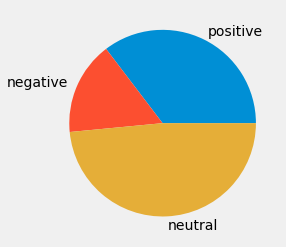

In [ ]:
posi=0
nega=0
neut=0
for i in range (0,len(ccdata)):
    get_val=ccdata.Comp[i]
    if(float(get_val)<(0)):
        nega=nega+1
        ccdata.target[i]=0
    if(float(get_val>(0))):
        posi=posi+1
        ccdata.target[i]=2
    if(float(get_val==0)) :
        neut=neut+1
        ccdata.target[i]=1
posper=(posi/(len(ccdata)))*100
negper=(nega/(len(ccdata)))*100
neutra=(neut/(len(ccdata)))*100
print("% of positive tweets= ",posper)
print("% of negative tweets= ",negper)
print("% of neutral tweets= ",neutra)
arr=np.asarray([posper,negper,neutra], dtype=int)
mlpt.pie(arr,labels=['positive','negative','neutral'])
mlpt.plot()

In [ ]:
ccdata
from wordcloud import WordCloud

             Date  ... target
5      2014-01-01  ...      0
18     2014-01-02  ...      0
22     2014-01-02  ...      0
27     2014-01-02  ...      0
30     2014-01-02  ...      0
...           ...  ...    ...
17599  2016-03-29  ...      0
17605  2016-03-30  ...      0
17619  2016-03-30  ...      0
17620  2016-03-30  ...      0
17633  2016-03-31  ...      0

[2837 rows x 8 columns]


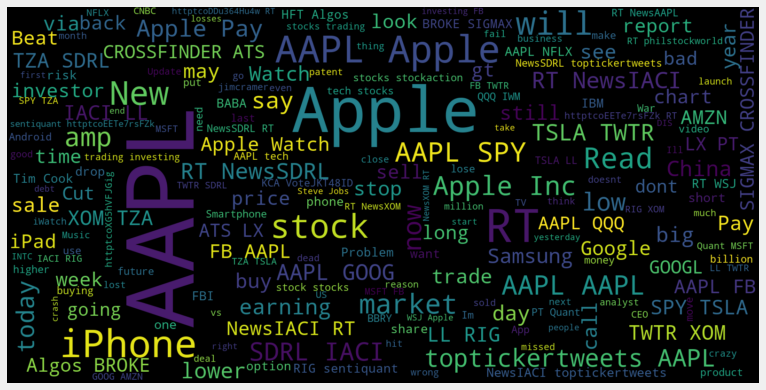

In [ ]:
neg_tweets = ccdata[ccdata.target == 0]
neg_string = []
print(neg_tweets)
for t in neg_tweets.Tweets:
    neg_string.append(t)
neg_string = pd.Series(neg_string).str.cat(sep=' ')

wordcloud = WordCloud(width=1600, height=800,max_font_size=200).generate(neg_string)
plt.figure(figsize=(12,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()


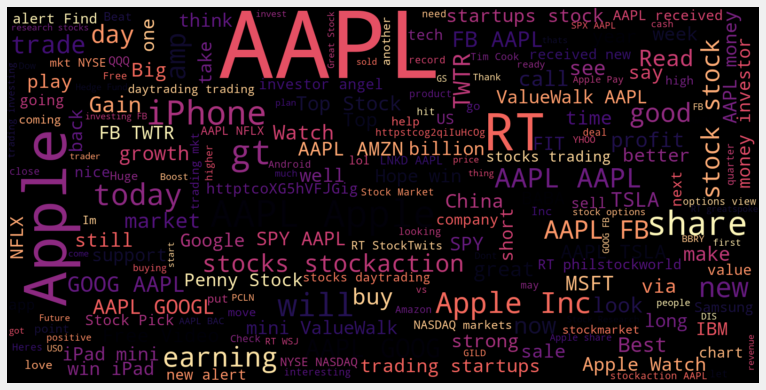

In [ ]:
pos_tweets = ccdata[ccdata.target == 2]
pos_string = []
for t in pos_tweets.Tweets:
    pos_string.append(t)
    
pos_string = pd.Series(pos_string).str.cat(sep=' ')

wordcloud = WordCloud(width=1600, height=800,max_font_size=200,colormap='magma').generate(pos_string)
plt.figure(figsize=(12,10)) 
plt.imshow(wordcloud, interpolation="bilinear") 
plt.axis("off") 
plt.show()

In [ ]:
ccdata.to_csv('ccdata_new.csv') 
df = pd.DataFrame(columns = ['Date', 'Positive','Negative','Neutral','Price'])
df 

,Date,Positive,Negative,Neutral,Price


In [ ]:
p=0
i=0
flg=0
while i<len(ccdata):
  d1=ccdata.Date[i]
  pi=ccdata.Prices[i]
  p=0
  n=0
  ni=0
  for j in range(i,len(ccdata)):
    if ccdata.Date[j]==d1:
      if ccdata.target[j]==0:
        ni+=1
      if ccdata.target[j]==1:
        n+=1
      else:
        p+=1

      
    else:
       df.at[i,'Date']=d1
       df.at[i,'Positive']=p
       df.at[i,'Neutral']=n
       df.at[i,'Negative']=ni
       df.at[i,'Price']=pi
     
       i=j+1
       break
    if j==len(ccdata)-1:
      flg=1
  if flg==1:
    break
  
     
      
      
     
  # print(i)
 

  
  



In [ ]:
df.index = np.arange(1, len(df) + 1)
df

,Date,Positive,Negative,Neutral,Price
1,2013-12-31,0,0,1,20.0364
2,2014-01-01,3,1,2,19.8955
3,2014-01-02,13,4,10,19.7546
4,2014-01-03,14,8,3,19.3207
5,2014-01-04,1,0,3,19.3734
...,...,...,...,...,...
774,2016-03-26,4,1,0,26.3575
775,2016-03-27,5,0,5,26.3575
776,2016-03-28,21,6,7,26.2975
777,2016-03-29,19,12,19,26.92


In [ ]:
df_compare = pd.DataFrame(columns=['Date','Open','Close','Comp'])
df_compare['Date'] = read_stock_p['Date']
df_compare['Open'] = read_stock_p['Open']
df_compare['Close'] = read_stock_p['Close']
for j in range(len(df_compare['Date'])) :
    total_comp=0;
    count=0;
    for i in range (len(ccdata['Date'])) :
        if(df_compare['Date'][j]==ccdata['Date'][i]) :
            total_comp = total_comp + ccdata['Comp'][i]
            count = count+1;
    avg_comp=0
    if(count!=0) :
        avg_comp = total_comp/count
    df_compare['Comp'][j]=avg_comp
df_compare


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app


,Date,Open,Close,Comp
0,2013-12-31,19.791786,20.036428,0
1,2014-01-02,19.845715,19.754642,0.0998583
2,2014-01-03,19.745001,19.320715,-0.0117722
3,2014-01-06,19.194643,19.426071,0.114861
4,2014-01-07,19.440001,19.287144,0.19038
...,...,...,...,...
560,2016-03-23,26.620001,26.532499,0.0190069
561,2016-03-24,26.367500,26.417500,0.0180346
562,2016-03-28,26.500000,26.297501,0.0588897
563,2016-03-29,26.222500,26.920000,-0.0461769


In [ ]:
ccdata.to_csv('ccdata_final.csv')

[]

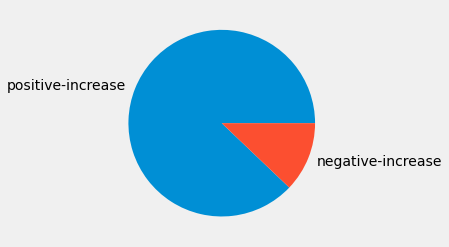

In [ ]:
count1 = 0
count2 = 0
for i in range(len(df_compare['Date'])) :
    if(df_compare['Open'][i]<df_compare['Close'][i] and df_compare['Comp'][i]>0) :
        count1+=1
    if(df_compare['Open'][i]<df_compare['Close'][i] and df_compare['Comp'][i]<0) :
        count2+=1
pos_incr = (count1*100)/(count1+count2)    
neg_incr = (count2*100)/(count1+count2)  
arr=np.asarray([pos_incr,neg_incr], dtype=int)
mlpt.pie(arr,labels=['positive-increase','negative-increase'])
mlpt.plot()

In [ ]:
df_prices = pd.DataFrame(columns=['Prices','Comp','Negative','Neutral','Positive'])
df_prices['Prices'] = ccdata['Prices']
df_prices['Comp']=ccdata['Comp']
df_prices['Negative']=ccdata['Negative']
df_prices['Neutral']=ccdata['Neutral']
df_prices['Positive']=ccdata['Positive']

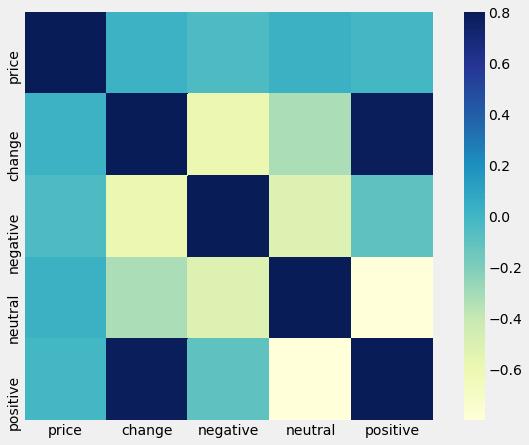

In [ ]:
import seaborn as sns
df_corr = pd.DataFrame(columns=['price','change','negative','neutral','positive'])
df_corr['price']= df_prices['Prices']
df_corr['change']= df_prices['Comp']
df_corr['negative']= df_prices['Negative']
df_corr['neutral']= df_prices['Neutral']
df_corr['positive']= df_prices['Positive']
# df_corr.reset_index(drop=True, inplace=True)
df_corr.to_csv('df_corr.csv', index=False)
data_corr= pd.read_csv('df_corr.csv')
corrmat = data_corr.corr()
fig = mlpt.figure(figsize = (10, 7))

sns.heatmap(corrmat, vmax = .8, square = True,cmap = 'YlGnBu')
mlpt.show()

In [ ]:
df_=ccdata[['Date','Prices','Comp','Negative','Neutral','Positive']].copy()

In [ ]:
df_

,Date,Prices,Comp,Negative,Neutral,Positive
0,2013-12-31,20.0364,0,0,1,0
1,2014-01-01,19.8955,0,0,1,0
2,2014-01-01,19.8955,0.4019,0,0.69,0.31
3,2014-01-01,19.8955,0.5095,0,0.798,0.202
4,2014-01-01,19.8955,0,0,1,0
...,...,...,...,...,...,...
17645,2016-03-31,27,0.6369,0,0.741,0.259
17646,2016-03-31,27,0,0,1,0
17647,2016-03-31,27,0,0,1,0
17648,2016-03-31,27,0.4767,0,0.86,0.14


In [ ]:
## Step 2 -------------------------------------------------------------------------------->

In [ ]:
train_start_index = 0
train_end_index = 16000
test_start_index = 16000
test_end_index = 17649
train = df_.loc[train_start_index : train_end_index]
test = df_.loc[test_start_index:test_end_index]

In [ ]:
sentiment_score_list = []
for date, row in train.T.iteritems():
    sentiment_score = np.asarray([df_.loc[date, 'Negative'],df_.loc[date, 'Positive'],df_.loc[date, 'Neutral']])
    sentiment_score_list.append(sentiment_score)
numpy_df_train = np.asarray(sentiment_score_list)

In [ ]:
numpy_df_train

array([[0.   , 0.   , 1.   ],
       [0.   , 0.   , 1.   ],
       [0.   , 0.31 , 0.69 ],
       ...,
       [0.185, 0.   , 0.815],
       [0.   , 0.213, 0.787],
       [0.   , 0.   , 1.   ]])

In [ ]:
sentiment_score_list = []
for date, row in test.T.iteritems():
    sentiment_score = np.asarray([df_.loc[date, 'Negative'],df_.loc[date, 'Positive'],df_.loc[date, 'Neutral']])
    sentiment_score_list.append(sentiment_score)
numpy_df_test = np.asarray(sentiment_score_list)

In [ ]:
numpy_df_test

array([[0.   , 0.   , 1.   ],
       [0.066, 0.   , 0.934],
       [0.   , 0.   , 1.   ],
       ...,
       [0.   , 0.   , 1.   ],
       [0.   , 0.14 , 0.86 ],
       [0.   , 0.184, 0.816]])

In [ ]:
y_train = pd.DataFrame(train['Prices'])

In [ ]:
y_train

,Prices
0,20.0364
1,19.8955
2,19.8955
3,19.8955
4,19.8955
...,...
15996,25.355
15997,25.355
15998,25.355
15999,25.355


In [ ]:
# Step 3-------------------------------------------------------->

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import math

In [ ]:
#Create a new dataframe with only the 'Close column
data = read_stock_p.filter(['Close'])
#Convert the dataframe to a numpy array
dataset = data.values
#Get the number of rows to train the model on
training_data_len = math.ceil( len(dataset) * .8 )

training_data_len

452

In [ ]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.14201568],
       [0.12371874],
       [0.09554297],
       [0.10238395],
       [0.09336313],
       [0.10129406],
       [0.08520014],
       [0.07689812],
       [0.08336821],
       [0.10808875],
       [0.13352815],
       [0.12631608],
       [0.09482404],
       [0.11430372],
       [0.11996209],
       [0.13079172],
       [0.1073467 ],
       [0.11761973],
       [0.01558382],
       [0.00224944],
       [0.        ],
       [0.0019016 ],
       [0.00405825],
       [0.02089416],
       [0.02970648],
       [0.0295209 ],
       [0.04614812],
       [0.06773809],
       [0.08390162],
       [0.08380871],
       [0.10354357],
       [0.10252303],
       [0.10716113],
       [0.08717134],
       [0.07274714],
       [0.05906498],
       [0.06439863],
       [0.05166741],
       [0.04074493],
       [0.06467706],
       [0.06136092],
       [0.06488575],
       [0.07295583],
       [0.07555312],
       [0.07181952],
       [0.07110066],
       [0.07221386],
       [0.084

In [ ]:
train_data = scaled_data[0:training_data_len , :]
#Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
  x_train.append(train_data[i-60:i, 0])
  y_train.append(train_data[i, 0])
  if i<= 61:
    print(x_train)
    print(y_train)
    print()

[array([0.14201568, 0.12371874, 0.09554297, 0.10238395, 0.09336313,
       0.10129406, 0.08520014, 0.07689812, 0.08336821, 0.10808875,
       0.13352815, 0.12631608, 0.09482404, 0.11430372, 0.11996209,
       0.13079172, 0.1073467 , 0.11761973, 0.01558382, 0.00224944,
       0.        , 0.0019016 , 0.00405825, 0.02089416, 0.02970648,
       0.0295209 , 0.04614812, 0.06773809, 0.08390162, 0.08380871,
       0.10354357, 0.10252303, 0.10716113, 0.08717134, 0.07274714,
       0.05906498, 0.06439863, 0.05166741, 0.04074493, 0.06467706,
       0.06136092, 0.06488575, 0.07295583, 0.07555312, 0.07181952,
       0.07110066, 0.07221386, 0.08420291, 0.08540883, 0.07158765,
       0.05776647, 0.06252034, 0.07332686, 0.07300226, 0.06706559,
       0.07673579, 0.09139193, 0.10484208, 0.09276011, 0.08738003])]
[0.08598860507450468]

[array([0.14201568, 0.12371874, 0.09554297, 0.10238395, 0.09336313,
       0.10129406, 0.08520014, 0.07689812, 0.08336821, 0.10808875,
       0.13352815, 0.12631608, 0.09

In [ ]:
x_train, y_train = np.array(x_train), np.array(y_train)

In [ ]:
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(392, 60, 1)

In [ ]:
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences= False))
model.add(Dense(25))
model.add(Dense(1))

In [ ]:
model.compile(optimizer='adam', loss='mean_squared_error')


In [ ]:
model.fit(x_train, y_train, batch_size=1, epochs=20)

Epoch 1/20
392/392 [==============================] - 13s 22ms/step - loss: 0.0354
Epoch 2/20
392/392 [==============================] - 9s 22ms/step - loss: 0.0038
Epoch 3/20
392/392 [==============================] - 9s 22ms/step - loss: 0.0029
Epoch 4/20
392/392 [==============================] - 9s 22ms/step - loss: 0.0027
Epoch 5/20
392/392 [==============================] - 9s 22ms/step - loss: 0.0018
Epoch 6/20
392/392 [==============================] - 9s 22ms/step - loss: 0.0018
Epoch 7/20
392/392 [==============================] - 9s 22ms/step - loss: 0.0019
Epoch 8/20
392/392 [==============================] - 9s 22ms/step - loss: 0.0017
Epoch 9/20
392/392 [==============================] - 9s 22ms/step - loss: 0.0018
Epoch 10/20
392/392 [==============================] - 9s 22ms/step - loss: 0.0013
Epoch 11/20
392/392 [==============================] - 9s 22ms/step - loss: 0.0015
Epoch 12/20
392/392 [==============================] - 9s 22ms/step - loss: 0.0013
Epoch 13/20


In [ ]:
test_data = scaled_data[training_data_len - 60: , :]
#Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
  x_test.append(test_data[i-60:i, 0])

In [ ]:
x_test = np.array(x_test)

In [ ]:
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

In [ ]:
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

In [ ]:
rmse=np.sqrt(np.mean(((predictions- y_test)**2)))
rmse

0.7194897052509058

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


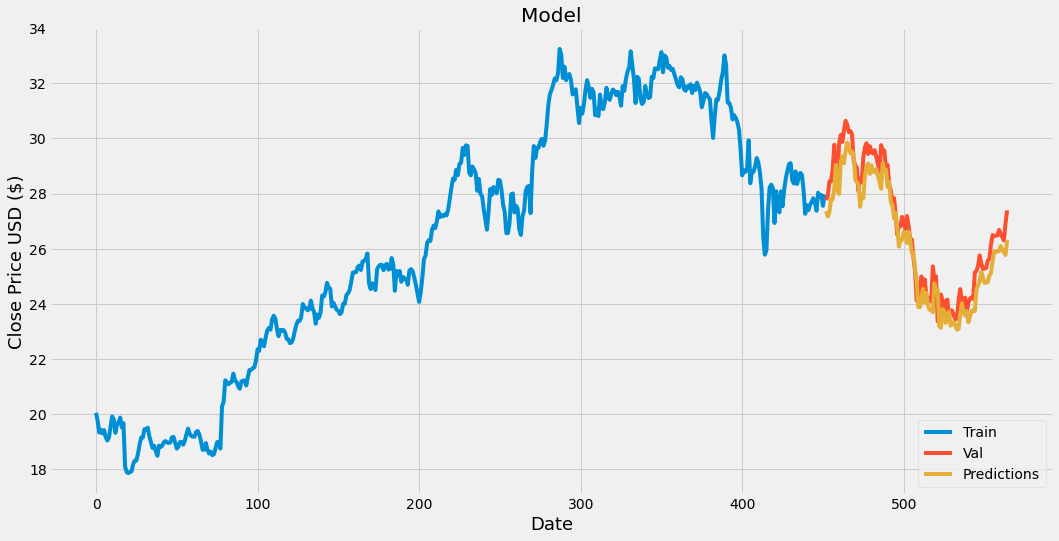

In [ ]:
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
#Visualize the data
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [ ]:
valid

,Close,Predictions
452,27.760000,27.359564
453,27.932501,27.168243
454,28.442499,27.330301
455,28.440001,27.799353
456,28.875000,27.787195
...,...,...
560,26.532499,26.090578
561,26.417500,25.975817
562,26.297501,25.874767
563,26.920000,25.769138


In [ ]:
## Step -4

In [ ]:
y_train

array([0.08598861, 0.08571044, 0.09709666, 0.09918371, 0.09046431,
       0.07430077, 0.05493712, 0.05486765, 0.07082243, 0.05496044,
       0.04598592, 0.05078628, 0.04215947, 0.04459449, 0.05834606,
       0.07279357, 0.0740226 , 0.05790556, 0.15766898, 0.16733931,
       0.21870517, 0.21462361, 0.20942904, 0.21265259, 0.21520332,
       0.23463657, 0.21944728, 0.21462361, 0.2045592 , 0.19887771,
       0.21578323, 0.21793975, 0.21819487, 0.20648392, 0.2266361 ,
       0.24305469, 0.24333292, 0.24704334, 0.24926947, 0.26517788,
       0.29184645, 0.28808968, 0.31445663, 0.30893747, 0.29884983,
       0.31946569, 0.33634802, 0.34221509, 0.33808723, 0.36204254,
       0.37097076, 0.36463989, 0.33915406, 0.32275872, 0.33769302,
       0.33574513, 0.33736843, 0.33217386, 0.31675257, 0.31545386,
       0.3065257 , 0.30782434, 0.31659017, 0.33412189, 0.34954319,
       0.3591206 , 0.35847141, 0.3673995 , 0.39889154, 0.38882708,
       0.3894764 , 0.38379484, 0.38671679, 0.40668333, 0.38834